## **Desastre do Titanic**

Rodolfo Viana<br>22 de novembro de 2018

### Introdução

---

Esta é uma análise exploratória dos registros de passageiros do Titanic. Os dados foram fornecidos pela plataforma Kaggle para o projeto final do nanodegree Fundamentos de Ciência de Dados I, da Udacity.

O objetivo da análise é responder a 16 perguntas. São elas:

1. Quantos passageiros havia no navio por gênero, em número absoluto e em porcentagem?
2. Quantos passageiros estavam em cada classe, em número absoluto e em porcentagem?
3. Quais os gêneros dos passageiros por classe?
4. Qual a faixa etária por gênero?
5. Quem eram os passageiros mais jovem e mais idoso?
6. Quantos passageiros viajavam acompanhados?
7. Quantos passageiros viajavam sozinhos?
8. Quantos passageiros embarcaram em cada classe, em cada porto?
9. Qual o valor médio do tíquete para cada classe?
10. Qual o valor médio do tíquete em cada classe para que viajava sozinho?
11. Qual o valor médio do tíquete em cada classe para que viajava acompanhado?
12. Quem não pagou passagem?
13. Qual a idade média das vítimas do naufrágio?
14. Qual a idade do sobrevivente mais novo?
15. Os sobreviventes são de que gênero, em valores absolutos e em proporção?
16. Qual a porcentagem de sobreviventes em cada classe do navio?

Para isso, serão usadas as bibliotecas `Pandas`, `Numpy`, `Matplotlib` e `Seaborn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
sns.set(style='darkgrid', font_scale=1.2)

titanic = pd.read_csv('data/titanic-data-6.csv')

## Limpeza

---

Após a leitura dos dados, observaremos a estrutura em que os registros estão disponíveis. Isso será feito com `.head()`, para ver os registros iniciais. Se for conveniente, podemos renomear colunas com `.rename()` ou traduzir valores, com `.map({key: value})`, considerando que os dados estão em inglês. 

Em seguida, obteremos informações sobre os tipos e se há valores nulos com `.info()`. Se houver necessidade, descartaremos (com `.dropna()`) ou preencheremos (com `.fillna()`) os valores nulos; se os valores nulos não tiverem influência nos resultados, ignoraremos.

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos traduzir ou mudar os headers para algo compreensível:

In [3]:
titanic.rename(columns={'PassengerId': 'id', 
                        'Survived': 'status_sobrevivencia', 
                        'Pclass': 'classe', 
                        'Name': 'nome', 
                        'Sex': 'genero', 
                        'Age': 'idade', 
                        'SibSp': 'conjuge_irmaos', 
                        'Parch': 'pais_filhos', 
                        'Ticket': 'passagem', 
                        'Fare': 'valor', 
                        'Cabin': 'cabine', 
                        'Embarked': 'porto_origem'}, 
               inplace=True)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
id                      891 non-null int64
status_sobrevivencia    891 non-null int64
classe                  891 non-null int64
nome                    891 non-null object
genero                  891 non-null object
idade                   714 non-null float64
conjuge_irmaos          891 non-null int64
pais_filhos             891 non-null int64
passagem                891 non-null object
valor                   891 non-null float64
cabine                  204 non-null object
porto_origem            889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Temos em análise 891 registros em 12 colunas. Em `idade`, `cabine` e `porto_origem` há valores nulos. No decorrer da análise veremos se eles influenciam nos resultados.

Vamos mudar, em `status_sobrevivencia` e `porto_origem`, as chaves pelo que elas representam. Assim não precisamos consultar a descrição sempre. Também em `genero`, para traduzir.

In [5]:
titanic['status_sobrevivencia'] = titanic['status_sobrevivencia'].map({0:'Não', 1:'Sim'})
titanic['porto_origem'] = titanic['porto_origem'].map({'C':'Cherbourg', 'Q':'Queenstown', 'S': 'Southampton'})
titanic['genero'] = titanic['genero'].map({'male':'Masculino', 'female':'Feminino'})
titanic.head()

,id,status_sobrevivencia,classe,nome,genero,idade,conjuge_irmaos,pais_filhos,passagem,valor,cabine,porto_origem
0,1,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,Southampton


### Corpo

---

Aqui responderemos às perguntas. A primeira é: _quantos passageiros havia no navio por gênero, em número absoluto e em porcentagem?_

In [6]:
def abs_perc(df, header):
    """
    Agrega, do Pandas, as funções value_counts -- valor absoluto -- e 
    value_counts(normalize=True) -- percentual -- em um único dataframe
    Argumentos:
        df = dataframe
        header = a coluna do dataframe que queremos tratar
    Resposta:
        dataframe
    """
    x = df[header].value_counts()
    x = pd.DataFrame(x)
    y = df[header].value_counts(normalize=True)
    y = pd.DataFrame(y)
    z = pd.concat([x, y], axis=1)
    z.columns = ['absoluto', 'percentual']
    return z


abs_perc(titanic, 'genero')

,absoluto,percentual
Masculino,577,0.647587
Feminino,314,0.352413


No Titanic, 577 passageiros eram homens (64,75%) e 314 eram mulheres (35,24%). 

A segunda pergunta é: _quantos passageiros estavam em cada classe, em número absoluto e em porcentagem?_

In [7]:
abs_perc(titanic, 'classe')

,absoluto,percentual
3,491,0.551066
1,216,0.242424
2,184,0.206510


Havia 216 passageiros na primeira classe (24,24% do total), 184 na segunda (20,65%) e 491 na terceira (55,10%).

A terceira pergunta é: _quais os gêneros dos passageiros por classe?_

In [8]:
def abs_perc_grp(df, header1, header2):
    """
    Agrupa uma série e, em outra, aplica as funções value_counts
    e value_counts(normalize=True)
    Argumentos:
        df = dataframe
        header1 = a série que será agrupada
        header2 = a série que trará os números
    Resposta:
        dataframe
    """
    x = df.groupby(header1)[header2].value_counts()
    x = pd.DataFrame(x)
    y = df.groupby(header1)[header2].value_counts(normalize=True)
    y = pd.DataFrame(y)
    z = pd.concat([x, y], axis=1)
    z.columns = ['absoluto', 'percentual']
    return z


abs_perc_grp(titanic, 'classe', 'genero')

absoluto  percentual
classe genero                         
1      Masculino       122    0.564815
       Feminino         94    0.435185
2      Masculino       108    0.586957
       Feminino         76    0.413043
3      Masculino       347    0.706721
       Feminino        144    0.293279

Na primeira classe havia 122 homens (56,48%) e 94 mulheres (43,51%). Na segunda, 108 homens (58,69%) e 76 mulheres (41,30%). Na terceira, 347 homens (70,67%) e 144 mulheres (29,32%).

A pergunta seguinte é: _qual a faixa etária por gênero?_

Para respondê-la, vamos ver quantos valores estão nulos em `idade`.

In [9]:
titanic['idade'].isnull().sum()

177

Há 177 registros com valor nulo -- ou seja, sem idade. Vamos temporariamente remover esses registros.

In [10]:
idade_valida = titanic[titanic['idade'].notnull()]
idade_valida.groupby('genero')['idade'].mean()

genero
Feminino     27.915709
Masculino    30.726645
Name: idade, dtype: float64

(Apenas como teste, vamos fazer o mesmo procedimento, mas sem descartar os valores nulos.)

In [11]:
titanic.groupby('genero')['idade'].mean()

genero
Feminino     27.915709
Masculino    30.726645
Name: idade, dtype: float64

O resultado é o mesmo, o que nos leva a acreditar que `.mean()` automaticamente descarta valores nulos.

Apesar de termos a média das idades -- 27,9 para mulheres e 30,7 para homens --, não respondemos à pergunta sobre faixa etária. Vamos à ela:

In [12]:
estagio = []
for x in titanic['idade']:
    if x < 12:
        estagio.append('Menos de 12 anos')
    elif 12 <= x < 18:
        estagio.append('12 a 17 anos')
    elif 18 <= x < 30:
        estagio.append('18 a 29 anos')
    elif 30 <= x < 45:
        estagio.append('30 a 44 anos')
    elif 45 <= x < 60:
        estagio.append('45 a 59 anos') 
    elif x >= 60:
        estagio.append('60 anos ou mais')
    else:
        estagio.append('Não informado')
titanic['estagio'] = estagio
titanic.pivot_table(index=['estagio'], columns=['genero'], values='nome', aggfunc='count')

genero,Feminino,Masculino
estagio,,
12 a 17 anos,23,22
18 a 29 anos,92,179
30 a 44 anos,78,137
45 a 59 anos,32,57
60 anos ou mais,4,22
Menos de 12 anos,32,36
Não informado,53,124


Observamos a existência de:

- 68 crianças (36 meninos e 32 meninas)
- 45 adolescentes (22 garotos e 23 garotas)
- 271 jovens adultos (179 homens e 92 mulheres)
- 215 adultos até 44 anos (137 homens e 78 mulheres)
- 89 adultos de 45 a 59 anos (57 homens e 32 mulheres)
- 26 idosos (22 homens e 4 mulheres)
- 177 sem idade informada (124 homens e 53 mulheres)

Como exercício, vamos ver a idade em gráfico, com distribuição por gênero:

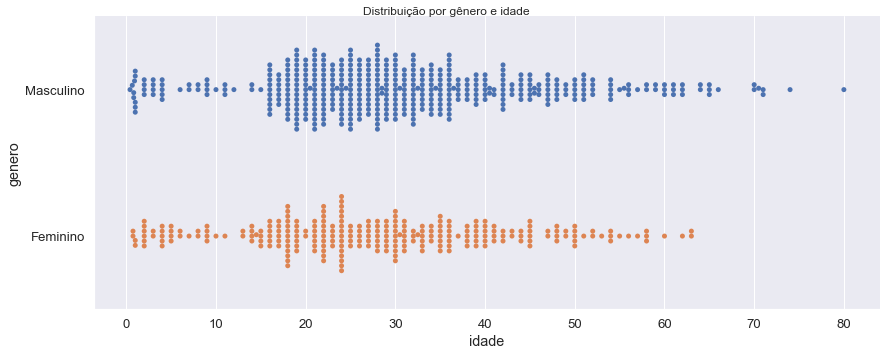

In [13]:
ax = sns.catplot(x='idade', 
            y='genero', 
            data=titanic.query('valor > 0'), 
            kind='swarm', 
            height=5, 
            aspect=2.5)
ax.fig.suptitle('Distribuição por gênero e idade');

Observamos que há mais homens que mulheres em todos os quadrantes de 10 anos. E que há apenas homens com mais de 65 anos.

A pergunta seguinte: _quem eram os passageiros mais jovem e mais idoso?_

In [14]:
titanic.loc[titanic['idade'].idxmin()]

id                                                  804
status_sobrevivencia                                Sim
classe                                                3
nome                    Thomas, Master. Assad Alexander
genero                                        Masculino
idade                                              0.42
conjuge_irmaos                                        0
pais_filhos                                           1
passagem                                           2625
valor                                            8.5167
cabine                                              NaN
porto_origem                                  Cherbourg
estagio                                Menos de 12 anos
Name: 803, dtype: object

In [15]:
titanic.loc[titanic['idade'].idxmax()]

id                                                       631
status_sobrevivencia                                     Sim
classe                                                     1
nome                    Barkworth, Mr. Algernon Henry Wilson
genero                                             Masculino
idade                                                     80
conjuge_irmaos                                             0
pais_filhos                                                0
passagem                                               27042
valor                                                     30
cabine                                                   A23
porto_origem                                     Southampton
estagio                                      60 anos ou mais
Name: 630, dtype: object

O passageiro mais idoso é Mr. Barkworth, com 80 anos. Ele ocupava a cabine A23, pela qual pagou 30 dinheiros, e viajava sozinho. Sobreviveu ao acidente.

O passageiro mais novo é Mr. Thomas, com menos de 6 meses de vida. Não há registro de qual cabine ocupava, mas sua passagem na terceira classe custou 8,5 dinheiros. Estava acompanhado por um dos pais, e sobreviveu ao acidente.

As duas perguntas seguintes são: _quantos passageiros viajavam acompanhados?_ e _quantos passageiros viajavam sozinhos?_

In [16]:
sozinho_acompanhado = []
for x, y in zip(titanic['conjuge_irmaos'], titanic['pais_filhos']):
    if x == 0 and y == 0:
        sozinho_acompanhado.append('Sozinho')
    else:
        sozinho_acompanhado.append('Acompanhado')
titanic['sozinho_acompanhado'] = sozinho_acompanhado
titanic['sozinho_acompanhado'].value_counts()

Sozinho        537
Acompanhado    354
Name: sozinho_acompanhado, dtype: int64

Temos 537 passageiros viajando sozinhos, e 354 acompanhados.

A pergunta seguinte é: _quantos passageiros embarcaram em cada classe, em cada porto?_

In [17]:
abs_perc_grp(titanic, 'porto_origem', 'classe')

absoluto  percentual
porto_origem classe                      
Cherbourg    1             85    0.505952
             3             66    0.392857
             2             17    0.101190
Queenstown   3             72    0.935065
             2              3    0.038961
             1              2    0.025974
Southampton  3            353    0.548137
             2            164    0.254658
             1            127    0.197205

Em Cherbourg, embarcaram 85 passageiros na primeira classe, 17 na segunda e 66 na terceira. Foi o porto onde mais embarcaram passageiros na primeira classe, em valores proporcionais (50,59% do total). 

Em Queenstown, embarcaram 2 pessoas na primeira classe, 3 na segunda e 72 na terceira. Proporcionalmente foi o porto onde mais embarcou passageiro na terceira classe; contudo, em valores absolutos, considerando as três classes, foi onde teve menos passageiros: 77 no total.

Southampton foi o porto com a maior quantidade de passageiros. Na primeira classe, foram 127; na segunda, 164, na terceira, 353.

A pergunta seguinte: _qual o valor médio do tíquete para cada classe?_

In [18]:
titanic['valor'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: valor, dtype: float64

O valor médio do bilhete foi de 32,20 dinheiros. Contudo, o desvio-padrão está muito elevado, o que indica grande dispersão dos valores. 

Essa distribuição irregular pode ser observada também quando, tendo a média, buscamos a mediana, cujo valor possivelmente é bem inferior -- considerando que a concentração está nos percentis iniciais. A mediana é 14,45. Além disso, até o terceiro quartil encontramos valor abaixo da média: 31 dinheiros.

Vamos ver em gráfico a distribuição:

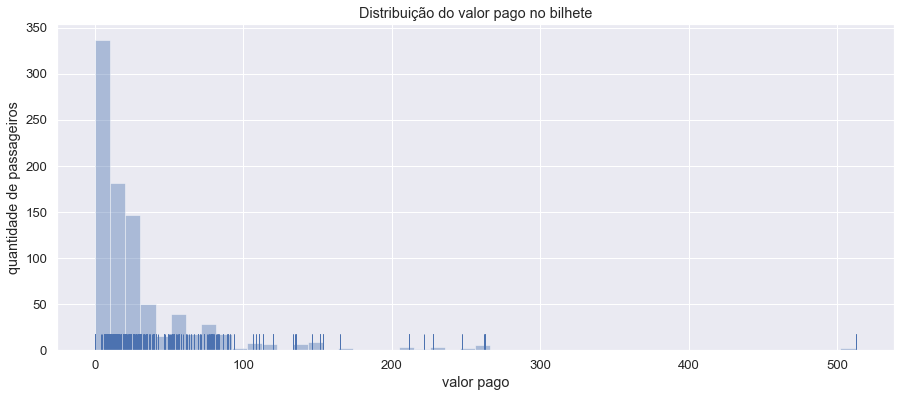

In [19]:
f, ax = plt.subplots(figsize = (15, 6))
plt.title('Distribuição do valor pago no bilhete')
sns.distplot(titanic['valor'], kde=False, rug=True, bins=50)
ax.set(xlabel='valor pago', ylabel='quantidade de passageiros');

Apesar do valor médio ser 32,20 dinheiros, o gráfico mostra a disparidade de valores pagos. Passageiros que pagaram entre 0 e 10 dinheiros são quase o dobro dos que pagaram entre 11 e 20. Além disso, há ainda aqueles que pagaram acima de 100, acima de 200 e acima de 500.

Até o momento não respondemos à pergunta, que pede distinção por classe. Vamos à resposta:

In [20]:
titanic.groupby('classe')['valor'].describe()

,count,mean,std,min,25%,50%,75%,max
classe,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Os passageiros da primeira classe pagaram, em média, 84,15 dinheiros. Os da segunda, 20,66. Os da terceira, 13,67.

As perguntas seguintes são: _qual o valor médio do tíquete em cada classe para que viajava sozinho?_ e _qual o valor médio do tíquete em cada classe para que viajava acompanhado?_

In [21]:
titanic.groupby(['classe', 'sozinho_acompanhado'])['valor'].mean()

classe  sozinho_acompanhado
1       Acompanhado            105.019706
        Sozinho                 63.672514
2       Acompanhado             29.237084
        Sozinho                 14.066106
3       Acompanhado             22.218864
        Sozinho                  9.272052
Name: valor, dtype: float64

Na primeira classe, passageiros que viajavam sozinhos pagaram, em média, 63,67 dinheiros; acompanhados, 105,01.

Na segunda classe, os valores foram, respectivamente, 14,06 e 29,23.

Na terceira, 9,27 e 22,21, respectivamente.

A pergunta seguinte: _quem não pagou passagem?_

In [22]:
titanic[titanic['valor'] == 0]

,id,status_sobrevivencia,classe,nome,genero,idade,conjuge_irmaos,pais_filhos,passagem,valor,cabine,porto_origem,estagio,sozinho_acompanhado
179,180,Não,3,"Leonard, Mr. Lionel",Masculino,36.0,0,0,LINE,0.0,NaN,Southampton,30 a 44 anos,Sozinho
263,264,Não,1,"Harrison, Mr. William",Masculino,40.0,0,0,112059,0.0,B94,Southampton,30 a 44 anos,Sozinho
271,272,Sim,3,"Tornquist, Mr. William Henry",Masculino,25.0,0,0,LINE,0.0,NaN,Southampton,18 a 29 anos,Sozinho
277,278,Não,2,"Parkes, Mr. Francis ""Frank""",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
302,303,Não,3,"Johnson, Mr. William Cahoone Jr",Masculino,19.0,0,0,LINE,0.0,NaN,Southampton,18 a 29 anos,Sozinho
413,414,Não,2,"Cunningham, Mr. Alfred Fleming",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
466,467,Não,2,"Campbell, Mr. William",Masculino,NaN,0,0,239853,0.0,NaN,Southampton,Não informado,Sozinho
481,482,Não,2,"Frost, Mr. Anthony Wood ""Archie""",Masculino,NaN,0,0,239854,0.0,NaN,Southampton,Não informado,Sozinho
597,598,Não,3,"Johnson, Mr. Alfred",Masculino,49.0,0,0,LINE,0.0,NaN,Southampton,45 a 59 anos,Sozinho
633,634,Não,1,"Parr, Mr. William Henry Marsh",Masculino,NaN,0,0,112052,0.0,NaN,Southampton,Não informado,Sozinho


Temos 15 pessoas que não pagaram passagem. Todos os passageiros que viajaram de graça eram homens, sozinhos, e embarcaram em Southampton.

A pergunta seguinte é: _qual a idade média das vítimas do naufrágio?_

In [23]:
titanic.query('status_sobrevivencia == "Não"')['idade'].mean()

30.62617924528302

As vítimas do naufrágio tinham, em média, 30 anos e meio. Vamos ver a média de idade dos sobreviventes:

In [24]:
titanic.query('status_sobrevivencia != "Não"')['idade'].mean()

28.343689655172415

A pergunta seguinte é: _qual a idade do sobrevivente mais novo?_

In [25]:
titanic.query('status_sobrevivencia != "Não"')['idade'].min()

0.42

O sobrevivente mais novo tinha menos de 6 meses. Vamos ver quem é:

In [26]:
titanic[titanic['idade'] == 0.42]

,id,status_sobrevivencia,classe,nome,genero,idade,conjuge_irmaos,pais_filhos,passagem,valor,cabine,porto_origem,estagio,sozinho_acompanhado
803,804,Sim,3,"Thomas, Master. Assad Alexander",Masculino,0.42,0,1,2625,8.5167,NaN,Cherbourg,Menos de 12 anos,Acompanhado


A pergunta seguinte é: _os sobreviventes são de que gênero, em valores absolutos e em proporção?_

In [27]:
abs_perc_grp(titanic, 'genero', 'status_sobrevivencia')

absoluto  percentual
genero    status_sobrevivencia                      
Feminino  Sim                        233    0.742038
          Não                         81    0.257962
Masculino Não                        468    0.811092
          Sim                        109    0.188908

Das 314 mulheres, 233 sobreviveram -- ou seja, 74,2% do total de passageiros do sexo feminino.

Quanto aos homens, temos 577 sujeitos, dos quais 109 sobreviveram -- 18,9% do total do gênero masculino.

Vamos ver em gráfico:

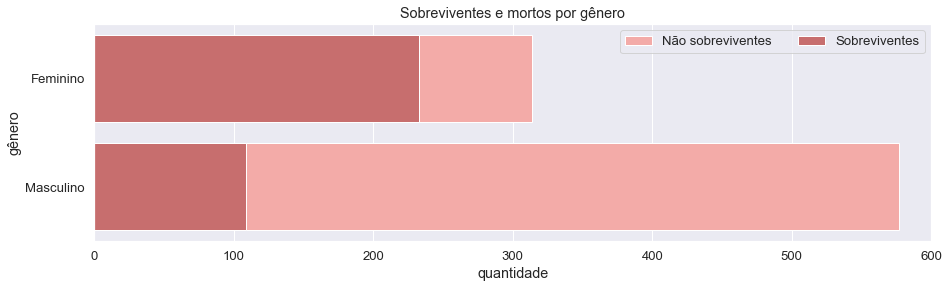

In [28]:
titanic['total_genero'] = titanic.groupby(['genero'])['genero'].transform('count') # Esta coluna é só para ser usada no gráfico
genero_sobrev = titanic.groupby(['genero', 'total_genero'])['status_sobrevivencia'].value_counts()
genero_sobrev = pd.DataFrame(genero_sobrev).rename(columns = {'status_sobrevivencia': 'quantidade'}).reset_index()
genero_sobrev_sim = genero_sobrev[genero_sobrev['status_sobrevivencia'] == 'Sim']
f, ax = plt.subplots(figsize = (15, 4))
plt.title('Sobreviventes e mortos por gênero')
sns.set_color_codes('pastel')
sns.barplot(x = 'total_genero',
            y = 'genero', 
            data = genero_sobrev_sim,
            label = 'Não sobreviventes', 
            color = 'r', 
            ci = None)
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'genero', 
            data = genero_sobrev_sim,
            label = 'Sobreviventes', 
            color = 'r', 
            ci = None)
ax.legend(ncol = 2, 
          loc = 'upper right', 
          frameon = True)
ax.set(xlim = (0, 600), 
       ylabel = 'gênero',
       xlabel = 'quantidade');

A pergunta final: _qual a porcentagem de sobreviventes em cada classe do navio?_

In [29]:
abs_perc_grp(titanic, 'classe', 'status_sobrevivencia')

absoluto  percentual
classe status_sobrevivencia                      
1      Sim                        136    0.629630
       Não                         80    0.370370
2      Não                         97    0.527174
       Sim                         87    0.472826
3      Não                        372    0.757637
       Sim                        119    0.242363

Notadamente há maior proporção de sobreviventes da primeira classe do que na segunda e na terceira. 

Temos:

- 62,96% dos passageiros da primeira classe sobreviveram;
- 47,28% dos da segunda classe;
- 24,23% dos da terceira classe.

### Conclusão

---

A análise indica que, dos 891 passageiros, 577 eram homens (64,75%) e 314 eram mulheres (35,24%). Eles estavam divididos da seguinte forma, em relação à classe ocupada:

- primeira classe: 122 homens (56,48%) e 94 mulheres (43,51%)
- segunda classe: 108 homens (58,69%) e 76 mulheres (41,30%)
- terceira classe: 347 homens (70,67%) e 144 mulheres (29,32%)

Quanto à faixa etária, os passageiros se dividem da seguinte maneira:

- 68 crianças, sendo 36 meninos e 32 meninas
- 45 adolescentes, sendo 22 garotos e 23 garotas
- 271 jovens adultos, sendo 179 homens e 92 mulheres
- 215 adultos até 44 anos, sendo 137 homens e 78 mulheres
- 89 adultos de 45 a 59 anos, sendo 57 homens e 32 mulheres
- 26 idosos, sendo 22 homens e 4 mulheres
- 177 sem idade informada, sendo 124 homens e 53 mulheres

Desses 891 passageiros, 537 viajavam sozinhos e 354 estavam acompanhados. Eles embarcaram em três portos: Cherbourg, Queenstown e Southampton.

Em Cherbourg, embarcaram 85 passageiros na primeira classe, 17 na segunda e 66 na terceira. Foi o porto onde mais embarcaram passageiros na primeira classe, em valores proporcionais (50,59% do total). 

Em Queenstown, embarcaram 2 pessoas na primeira classe, 3 na segunda e 72 na terceira. Proporcionalmente foi o porto onde mais embarcou passageiro na terceira classe; contudo, em valores absolutos, considerando as três classes, foi onde teve menos passageiros: 77 no total.

Southampton foi o porto com a maior quantidade de passageiros. Na primeira classe, foram 127; na segunda, 164, na terceira, 353.

Eles pagaram, em média, 32,20 dinheiros pela viagem. O valor varia por classe: os passageiros da primeira classe desembolsaram, em média, 84,15 dinheiros. Os da segunda, 20,66. Os da terceira, 13,67.

Entretanto, 15 passageiros não pagaram o bilhete. Todos eram homens, viajavam sozinhos e embarcaram em Southampton.

Southampton também foi o porto onde o passageiro mais novo do Titanic embarcou. Com menos de 6 meses de vida,  Mr. Thomas estava acompanhado de um de seus pais na terceira classe. Sua passagem custou 8,5 dinheiros. 

O infante Mr. Thomas sobreviveu ao acidente. Também sobreviveu ao desastre o mais idoso dos passageiros, Mr. Barkworth, que tinha 80 anos. Ele ocupava a cabine A23, pela qual pagou 30 dinheiros, e viajava sozinho.

Mr. Thomas e Mr. Barkworth contrariaram a tendência: os homens foram as maiores vítimas do desastre. Dos 577 passageiros do sexo masculino, apenas 109 sobreviveram -- 18,9% do total de homens a bordo.

Entre as mulheres, 233 das 314 sobreviveram -- 74,2% do total de passageiras.

Quanto à classe, é possível observar que a maioria dos passageiros da terceira classe não sobreviveram:

- 62,96% dos passageiros da primeira classe sobreviveram
- 47,28% dos da segunda classe
- 24,23% dos da terceira classe

#### Limitações

Foram encontrados valores nulos nas colunas `idade`, `cabine` e `porto_origem`, o que limita a análise plena. Essa questão foi tratada da seguinte forma:

- `idade`: as operações realizadas com idade, como `.mean()`, já descartam valores nulos, sem a necessidade de exclusão ou preenchimento desses valores. Portanto, essa limitação foi ignorada.
- `cabine`: não usamos a coluna na análise.
- `porto_origem`: a operação que renomeou os portos -- `.map()` -- ignorou valores nulos, que eram irrisórios em relação ao total: 2 de 891. Assim, quando tratamos dos portos, esses 2 registros foram ignorados, e não houve prejuízo nos resultados.

---
**Leituras**

`pd.set_option`: [Options and settings](https://pandas.pydata.org/pandas-docs/stable/options.html), na documentação do Pandas<br>
`sns.set`: [seaborn.set](https://seaborn.pydata.org/generated/seaborn.set.html), na documentação do Seaborn<br>
`pd.series.map`: [Remap values in pandas column with a dict](https://stackoverflow.com/a/41678874), no Stack Overflow; [Pandas series map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html), na documentação do Pandas<br>
`pd.dataframe.pivot_table`: [Pandas dataframe pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html), na documentação do Pandas